In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [11]:
all_businesses = pd.read_csv('CSVs/all_businesses.csv', index_col=0, dtype={'zip_code': str})

In [12]:
all_businesses.columns

Index(['id', 'alias', 'name', 'is_claimed', 'is_closed', 'review_count',
       'rating', 'coordinates', 'business_type', 'price', 'zip_code', 'city',
       'state', 'delivery', 'pickup', 'covid_cases', 'covid_tests',
       'covid_deaths', 'zipcode_population', 'latitude', 'longitude'],
      dtype='object')

In [13]:
closed = all_businesses[all_businesses.is_closed]

In [17]:
zipcodes_closed = closed.loc[:, ['id', 'zip_code']].groupby('zip_code').count().sort_values('id', ascending=False)

In [33]:
zipcodes_closed

,id
zip_code,
60622,57
60614,50
60607,47
60647,43
60618,40
60657,39
60625,32
60654,31
60611,31


In [ ]:
ax = sns.barplot("size", y="total_bill", data=tips, palette="Blues_d")

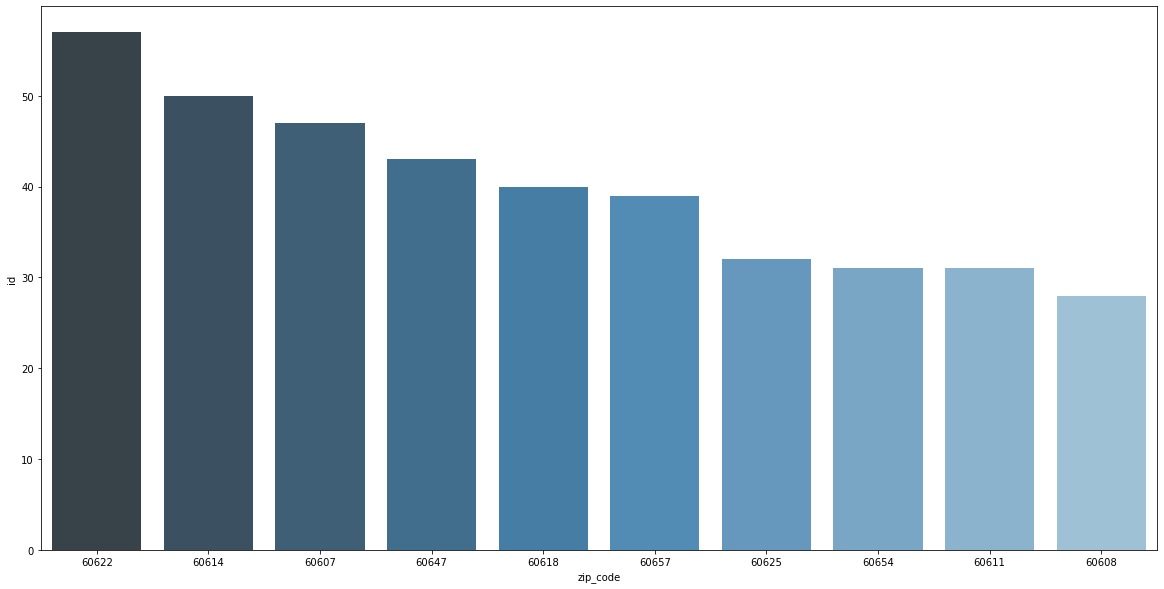

In [92]:
closed_by_zip_top10 = sns.barplot(x=zipcodes_closed.index[:10], y=zipcodes_closed.id[:10], palette="Blues_d", order=zipcodes_closed.index[:10])

In [58]:
fig = closed_by_zip_top10.get_figure()
fig.savefig('top10closedzips.png')

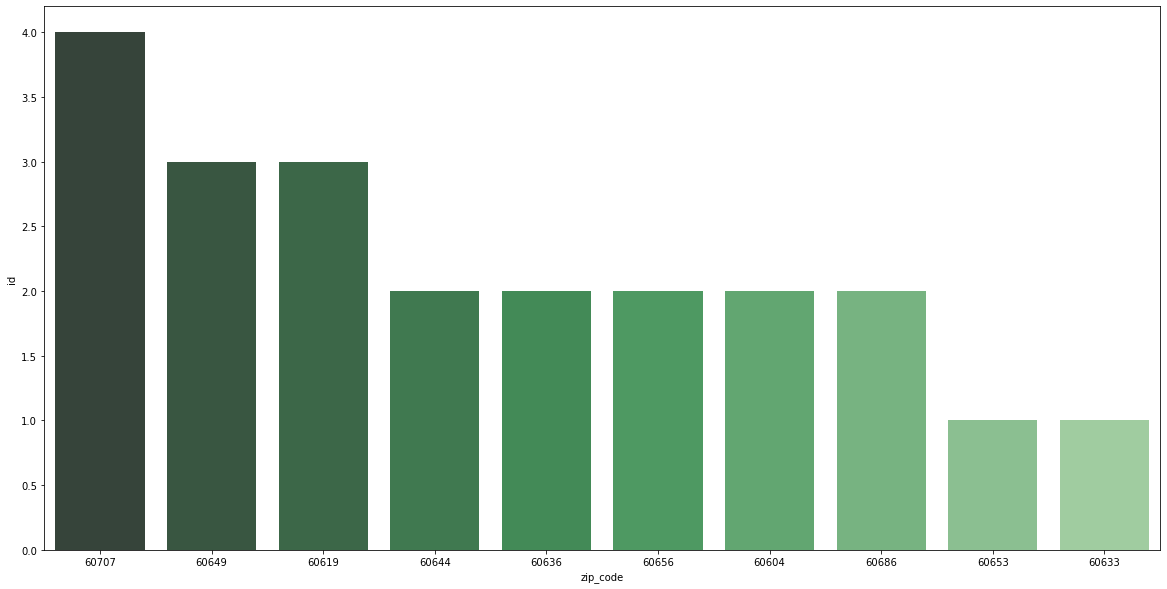

In [93]:
closed_by_zip_bottom10 = sns.barplot(x=zipcodes_closed.index[-10:], y=zipcodes_closed.id[-10:], palette="Greens_d", order=zipcodes_closed.index[-10:])
fig = closed_by_zip_top10.get_figure()
fig.savefig('bottom10closedzips.png')

In [60]:
_open = all_businesses[all_businesses.is_closed==False]

In [62]:
zipcodes_open = _open.loc[:, ['id', 'zip_code']].groupby('zip_code').count().sort_values('id', ascending=False)

In [74]:
zip_ratio_closed = zipcodes_open.merge(zipcodes_closed, left_index=True, right_index=True, how='right')

In [75]:
zip_ratio_closed['ratio_closed'] = zip_ratio_closed.id_y/zip_ratio_closed.id_x

In [76]:
zip_ratio_closed = zip_ratio_closed.iloc[:, [-1]]

In [78]:
zip_ratio_closed.sort_values('ratio_closed', ascending=False, inplace=True)

In [81]:
import mapclassify
import geopandas as gpd
%matplotlib inline

In [103]:
plt.rcParams['figure.figsize'] = (20, 20)

In [139]:
chicago = gpd.read_file('/Users/egemenpamukcu/Desktop/zipcodes1.geojson')

In [145]:
chicago.boundaries.plot();

AttributeError: 'GeoDataFrame' object has no attribute 'boundaries'

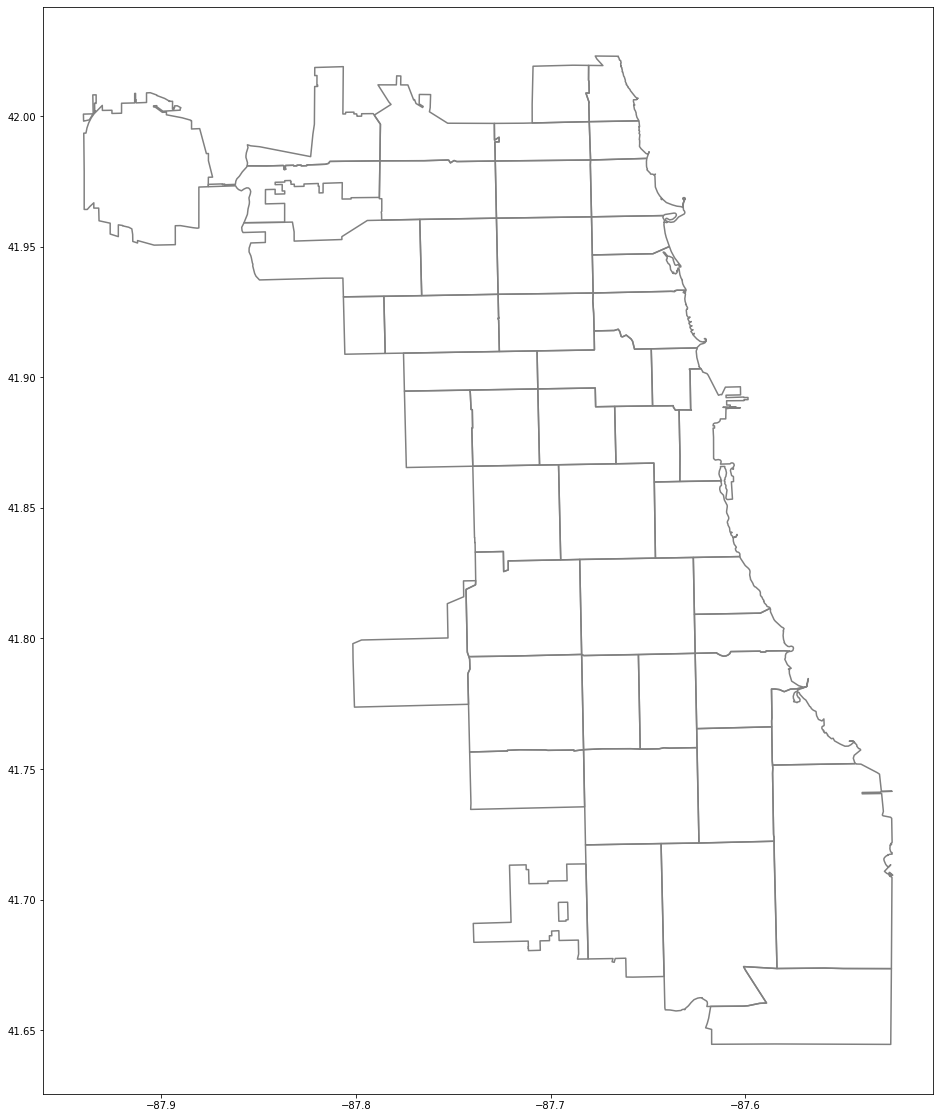

In [163]:
chicago.boundary.plot(color = "grey");

In [157]:
zip_ratio_closed.head()

,ratio_closed
zip_code,
60630,0.163399
60659,0.162651
60621,0.153846
60622,0.151194
60652,0.142857


In [155]:
chicago_zip_closed = chicago.merge(zip_ratio_closed, right_index=True, left_on='ZIP')

In [156]:
chicago_zip_closed.head()

,ZIP,name,geometry,ratio_closed
0,60647,None,"POLYGON ((-87.67762 41.91776, -87.67747 41.910...",0.098398
1,60639,None,"POLYGON ((-87.72683 41.92265, -87.72708 41.922...",0.058824
2,60707,None,"POLYGON ((-87.78500 41.90915, -87.80575 41.908...",0.039604
3,60651,None,"POLYGON ((-87.70656 41.89555, -87.77513 41.894...",0.130435
4,60638,None,"POLYGON ((-87.74347 41.81876, -87.74281 41.795...",0.059459


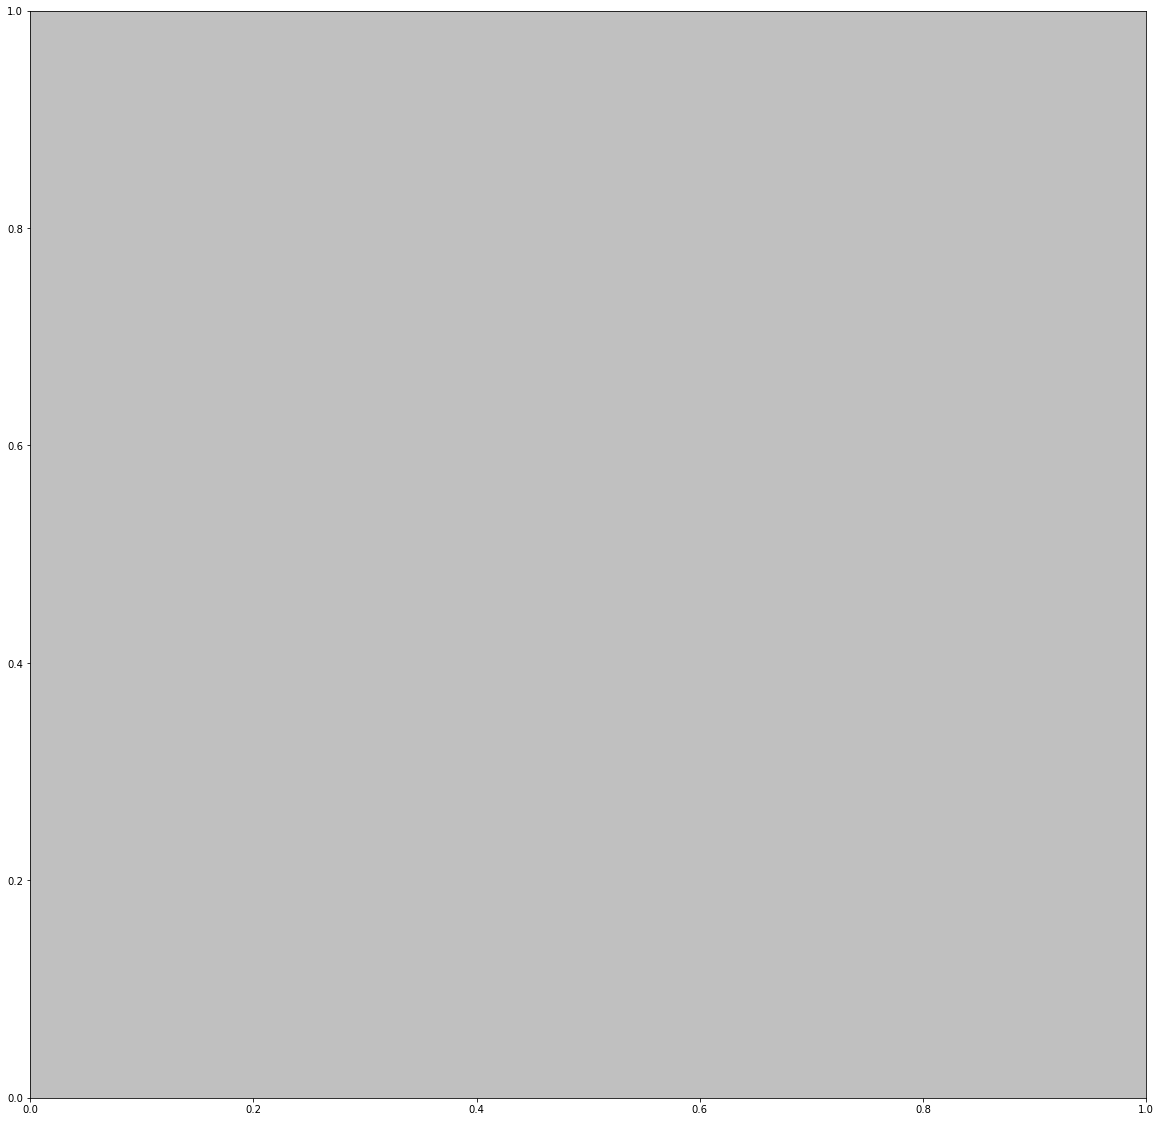

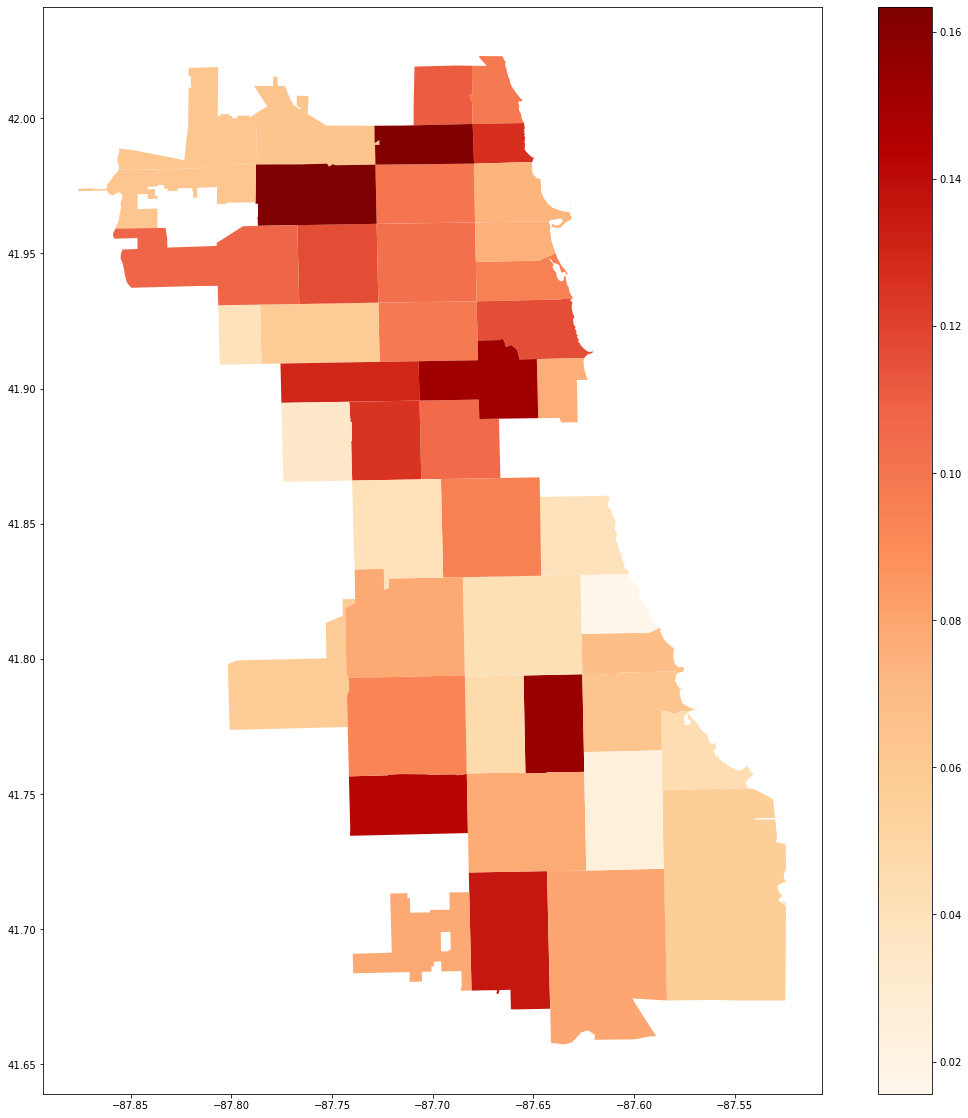

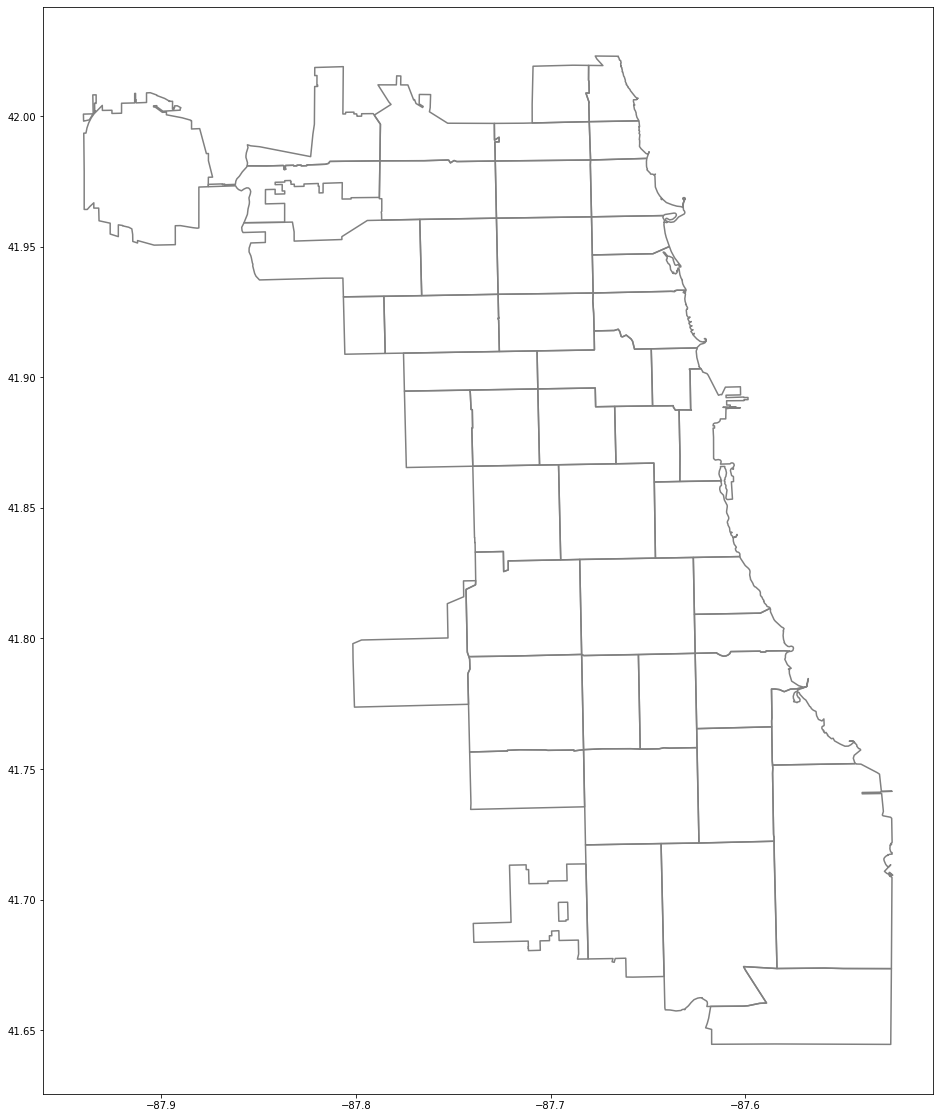

In [166]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_facecolor('silver')
chicago_zip_closed.plot(column=chicago_zip_closed.ratio_closed, legend=True, cmap='OrRd')
chicago.boundary.plot(color = "grey");